In [1]:
import tensorflow as tf
import os
import zipfile
import shutil
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split


In [ ]:
# !wget --no-check-certificate \
#   https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

fileinZip = "D:/Bangkit/Belajar Machine Learning untuk Pemula/rockpaperscissors.zip"

In [27]:
# zip_ref = zipfile.ZipFile('/tmp/rockpaperscissors.zip', 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

In [2]:
data_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [3]:
def load_images_and_labels(image_directory, image_size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(image_directory):
        label_path = os.path.join(image_directory, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
                image = tf.keras.preprocessing.image.img_to_array(image)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)


# Load images and labels from the directory
data_dir = '/tmp/rockpaperscissors/rps-cv-images'
X, y = load_images_and_labels(data_dir, image_size=(150, 150))

# Normalize the images
X = X / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_validation, y_train, y_validation = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_validation.shape}")

Train features shape: (1312, 150, 150, 3)
Test features shape: (876, 150, 150, 3)


In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32
)

validation_generator = validation_datagen.flow(
    X_validation, y_validation, batch_size=32
)

# Display class indices
print("Class indices:", label_encoder.classes_)


Class indices: ['paper' 'rock' 'scissors']


Using EfficientNetB0

In [5]:

efficientNet_model = tf.keras.applications.EfficientNetB0(input_shape=(150, 150, 3),
                                                          include_top=False,
                                                          weights='imagenet')
efficientNet_model.trainable = False

model1 = tf.keras.models.Sequential([
         efficientNet_model,
         tf.keras.layers.GlobalAveragePooling2D(),
         tf.keras.layers.Dense(512, activation='relu'),
         tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model1.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 18s 1us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [6]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history1 = model1.fit(
                  train_generator,
                  steps_per_epoch=25,
                  epochs=20,
                  validation_data=validation_generator,
                  validation_steps=5,
                  verbose=2)

Epoch 1/20


c:\Users\hp\anaconda3\envs\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 28s - 1s/step - accuracy: 0.3413 - loss: 1.1667 - val_accuracy: 0.3750 - val_loss: 1.1441
Epoch 2/20


c:\Users\hp\anaconda3\envs\my_env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


25/25 - 6s - 257ms/step - accuracy: 0.3105 - loss: 1.1513 - val_accuracy: 0.3375 - val_loss: 1.1055
Epoch 3/20
25/25 - 11s - 428ms/step - accuracy: 0.2962 - loss: 1.1521 - val_accuracy: 0.3063 - val_loss: 1.1042
Epoch 4/20
25/25 - 6s - 231ms/step - accuracy: 0.3457 - loss: 1.1240 - val_accuracy: 0.2937 - val_loss: 1.1140
Epoch 5/20
25/25 - 11s - 426ms/step - accuracy: 0.3275 - loss: 1.1144 - val_accuracy: 0.3000 - val_loss: 1.1024
Epoch 6/20
25/25 - 6s - 227ms/step - accuracy: 0.3066 - loss: 1.1079 - val_accuracy: 0.3026 - val_loss: 1.1134
Epoch 7/20
25/25 - 10s - 401ms/step - accuracy: 0.3475 - loss: 1.1009 - val_accuracy: 0.3250 - val_loss: 1.1004
Epoch 8/20
25/25 - 6s - 248ms/step - accuracy: 0.3750 - loss: 1.0961 - val_accuracy: 0.4437 - val_loss: 1.0790
Epoch 9/20
25/25 - 10s - 415ms/step - accuracy: 0.2937 - loss: 1.1080 - val_accuracy: 0.3688 - val_loss: 1.0976
Epoch 10/20
25/25 - 6s - 243ms/step - accuracy: 0.3281 - loss: 1.1029 - val_accuracy: 0.4062 - val_loss: 1.0970
Epoch 1

In [7]:
eval = model1.evaluate(X_validation, y_validation, verbose=1)
print(f'Test loss: {eval[0]}')
print(f'Test accuracy: {eval[1]}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.3319 - loss: 1.0982
Test loss: 1.0993468761444092
Test accuracy: 0.32534247636795044


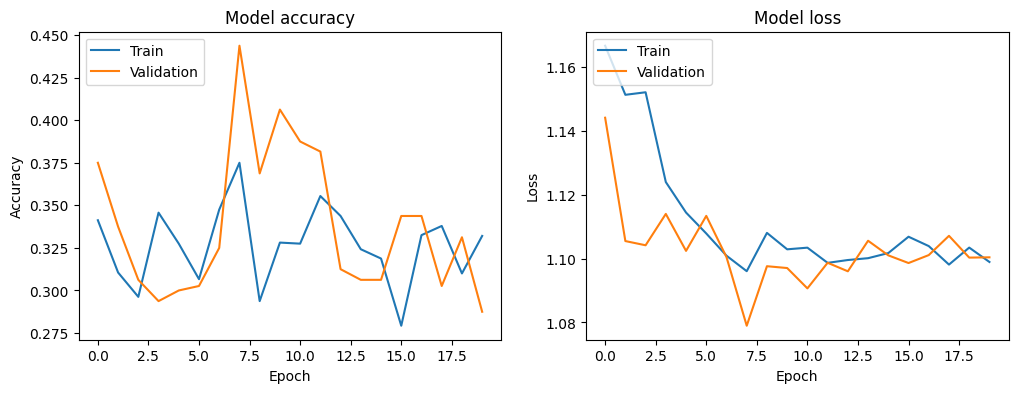

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


using ResNet50

In [58]:
ResNet_model = tf.keras.applications.ResNet50(input_shape=(150, 150, 3),
                                            include_top=False,
                                            weights='imagenet')
ResNet_model.trainable = False

model2 = tf.keras.models.Sequential([
         ResNet_model,
         tf.keras.layers.GlobalAveragePooling2D(),
         tf.keras.layers.Dense(512, activation='relu'),
         tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [59]:
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_19     │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [64]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history2 = model2.fit(
                  train_generator,
                  steps_per_epoch=10,
                  epochs=20,
                  validation_data=validation_generator,
                  validation_steps=5,
                  verbose=2)

Epoch 1/20
10/10 - 22s - 2s/step - accuracy: 0.3812 - loss: 1.0839 - val_accuracy: 0.4750 - val_loss: 1.0777
Epoch 2/20
10/10 - 9s - 914ms/step - accuracy: 0.3750 - loss: 1.0835 - val_accuracy: 0.4938 - val_loss: 1.0684
Epoch 3/20
10/10 - 9s - 906ms/step - accuracy: 0.4031 - loss: 1.0818 - val_accuracy: 0.3063 - val_loss: 1.1205
Epoch 4/20
10/10 - 9s - 898ms/step - accuracy: 0.3969 - loss: 1.0679 - val_accuracy: 0.2875 - val_loss: 1.0851
Epoch 5/20
10/10 - 4s - 360ms/step - accuracy: 0.3438 - loss: 1.0763 - val_accuracy: 0.4125 - val_loss: 1.0572
Epoch 6/20
10/10 - 11s - 1s/step - accuracy: 0.4469 - loss: 1.0720 - val_accuracy: 0.4474 - val_loss: 1.0646
Epoch 7/20
10/10 - 13s - 1s/step - accuracy: 0.4187 - loss: 1.0755 - val_accuracy: 0.3625 - val_loss: 1.0824
Epoch 8/20
10/10 - 12s - 1s/step - accuracy: 0.3938 - loss: 1.0735 - val_accuracy: 0.5063 - val_loss: 1.0503
Epoch 9/20
10/10 - 10s - 964ms/step - accuracy: 0.4406 - loss: 1.0609 - val_accuracy: 0.3438 - val_loss: 1.0731
Epoch 10

In [67]:
eval = model2.evaluate(X_validation, y_validation, verbose=1)
print(f'Test loss: {eval[0]}')
print(f'Test accuracy: {eval[1]}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 596ms/step - accuracy: 0.4155 - loss: 1.0625
Test loss: 1.084997296333313
Test accuracy: 0.3892694115638733


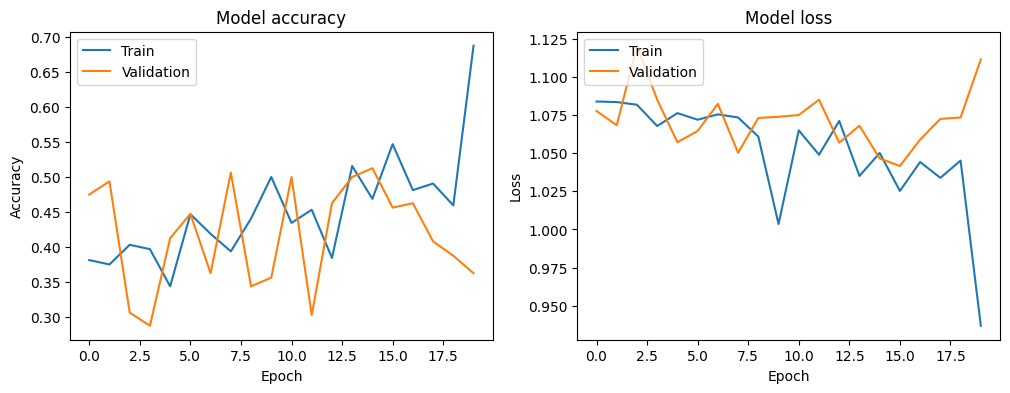

In [68]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Using MobileNetV2

In [14]:
MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')
MobileNetV2_model.trainable = False

model3 = tf.keras.models.Sequential([
         MobileNetV2_model,
         tf.keras.layers.GlobalAveragePooling2D(),
         tf.keras.layers.Dense(512, activation='relu'),
         tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

C:\Users\hp\AppData\Local\Temp\ipykernel_11244\1526921728.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 162s 17us/step


In [15]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history3 = model3.fit(
                  train_generator,
                  steps_per_epoch=25,
                  epochs=20,
                  validation_data=validation_generator,
                  validation_steps=5,
                  verbose=2)

Epoch 1/20
25/25 - 18s - 709ms/step - accuracy: 0.7387 - loss: 0.8463 - val_accuracy: 0.9125 - val_loss: 0.2338
Epoch 2/20
25/25 - 5s - 191ms/step - accuracy: 0.9551 - loss: 0.1370 - val_accuracy: 0.9688 - val_loss: 0.0815
Epoch 3/20
25/25 - 9s - 340ms/step - accuracy: 0.9650 - loss: 0.1102 - val_accuracy: 0.9688 - val_loss: 0.1008
Epoch 4/20
25/25 - 5s - 199ms/step - accuracy: 0.9746 - loss: 0.0841 - val_accuracy: 0.9625 - val_loss: 0.1650
Epoch 5/20
25/25 - 9s - 373ms/step - accuracy: 0.9787 - loss: 0.0822 - val_accuracy: 0.9812 - val_loss: 0.0741
Epoch 6/20
25/25 - 5s - 187ms/step - accuracy: 0.9805 - loss: 0.0698 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 7/20
25/25 - 9s - 344ms/step - accuracy: 0.9862 - loss: 0.0486 - val_accuracy: 0.9875 - val_loss: 0.0337
Epoch 8/20
25/25 - 5s - 193ms/step - accuracy: 0.9727 - loss: 0.0609 - val_accuracy: 0.9688 - val_loss: 0.0687
Epoch 9/20
25/25 - 9s - 348ms/step - accuracy: 0.9887 - loss: 0.0434 - val_accuracy: 0.9812 - val_loss: 0.0859


In [17]:
eval = model3.evaluate(X_validation, y_validation, verbose=1)
print(f'Test loss: {eval[0]}')
print(f'Test accuracy: {eval[1]}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.9797 - loss: 0.0598
Test loss: 0.05801069363951683
Test accuracy: 0.982876718044281


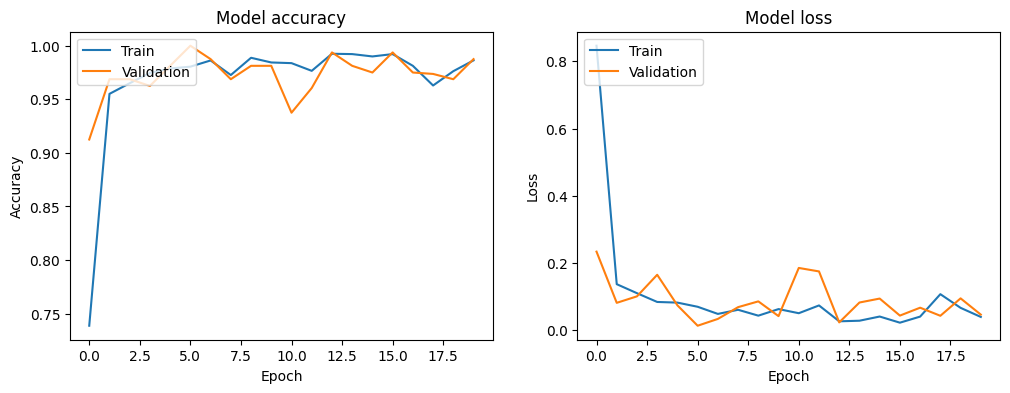

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


[[**BEST MODEL**]] <br>
**MobileNetV2** with accuracy 98% and validation accuracy 97%